***Implementation of Neural Network from Scratch using Numpy***

In [1]:
#DATASET
#A
a= [0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1]

#B
b= [0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0]

#C
c=[0,1,1,1,1,0,
  0,1,0,0,0,0,
  0,1,0,0,0,0,
  0,1,0,0,0,0,
  0,1,1,1,1,0]

In [2]:
#Creating labels
y=[[1,0,0],
   [0,1,0],
   [0,0,1]]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

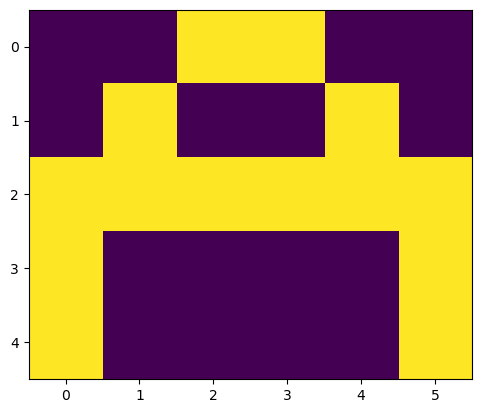

In [4]:
#visualisation of the data
plt.imshow(np.array(a).reshape(5,6))


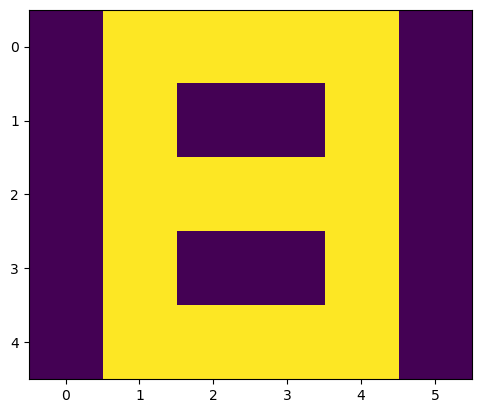

In [5]:
plt.imshow(np.array(b).reshape(5,6))

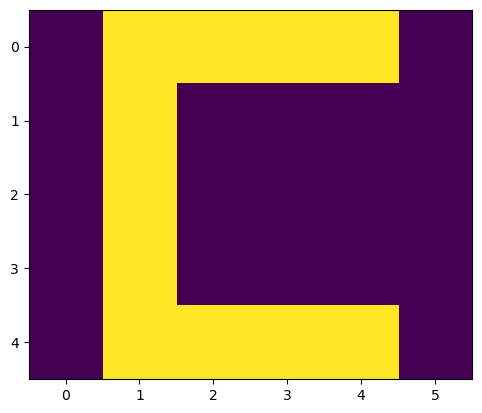

In [6]:
plt.imshow(np.array(c).reshape(5,6))

In [7]:
#convert data and labels into numpy array
x=[np.array(a).reshape(1,30), np.array(b).reshape(1,30), np.array(c).reshape(1,30)]

y= np.array(y)

print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [8]:
#input(1,30)
#hidden(1,5)
#output(3,3)

In [9]:
#avtication function

def sigmoid(x):
    return(1/(1+np.exp(-x)))

In [10]:
#creating feeds forword NN
def f_forword(x,w1,w2):
    #hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)

In [11]:
#initialize the weights
def generate_wt(x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.randn())
    return (np.array(l).reshape(x,y))

In [12]:
def loss(out, Y):
    s = (np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

In [13]:
#back propagation
def back_prop(x,y,w1,w2,alpha):

    #hidden
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = (a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), (np.multiply(a1, 1 - a1)))

    #gradient
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    w1 = w1 -(alpha*(w1_adj))
    w2 = w2 -(alpha*(w2_adj))

    return(w1,w2)

In [14]:
def train(x,Y,w1,w2,alpha = 0.01,epoch = 10):
    acc = []
    loss1 = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out= f_forword(x[i], w1,w2)
            l.append(loss(out, Y[i]))
            w1,w2 = back_prop(x[i], y[i],w1,w2,alpha)
            print("Epochs:", j+1, "acc:", (1-(sum(l)/len(x)))*100)
            acc.append((1-(sum(l)/len(x)))*100)
            loss1.append(sum(l)/len(x))
        return(acc,loss1,w1,w2)

In [15]:
def predict(x,w1,w2):
    Out = f_forword(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k=i
    if (k==0):
        print("Image is of letter A")
    elif (k==1):
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5,6))
    plt.show()

In [16]:
w1= generate_wt(30,5)
w2 = generate_wt(5,3)
print (w1, "\n",w2)

[[-2.46450467e+00 -9.13083900e-01  1.93089801e+00 -6.97752879e-01
   8.44981276e-01]
 [-4.98710338e-01 -3.21703194e-01 -1.03936127e-01  2.05799011e-01
  -3.24465082e-01]
 [ 2.30308595e+00  1.79633286e+00 -1.39655522e+00 -1.09092164e+00
  -2.72366122e-01]
 [-7.58006008e-01 -7.79774416e-01 -2.86602810e-02 -2.62412332e-01
  -7.81492325e-01]
 [ 2.03444759e+00  1.54895145e+00  6.36665443e-01  5.70586646e-01
   1.00031498e-01]
 [-9.49796799e-01 -3.48930015e-01 -1.10360770e+00 -9.90208923e-01
   1.59674996e+00]
 [-1.03574958e+00  3.27739885e+00 -5.55874219e-01 -4.94140771e-01
  -2.04521905e+00]
 [ 3.64634158e-01  1.69021884e+00  5.15537147e-01  2.24727737e-01
   5.15330800e-01]
 [-7.59004785e-02  1.61481485e+00 -1.56526761e+00  2.81042327e-01
   7.24066142e-01]
 [-4.13887670e-01 -6.78801484e-01  1.06696468e+00  1.89188982e+00
   6.25039011e-01]
 [ 4.64743525e-01  5.57370256e-01  2.68348020e-01  8.39015988e-01
   7.42111107e-01]
 [ 8.97750267e-01 -3.50804987e-03 -5.22504980e-01 -1.71017507e-01

In [17]:
acc, loss, w1, w2 = train(x,y,w1,w2,0.1,100)

Epochs: 1 acc: 90.7699435972624
Epochs: 1 acc: 66.96159591475114
Epochs: 1 acc: 62.22490499624753


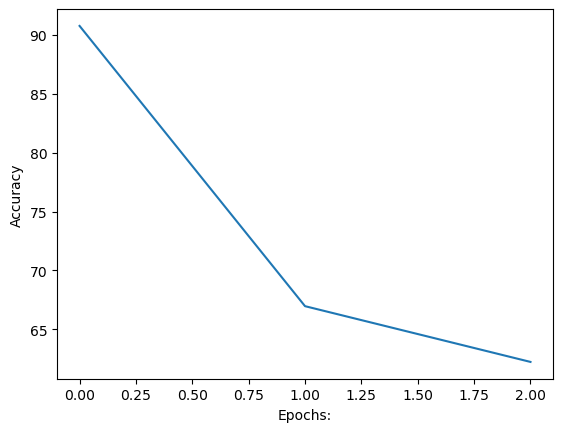

In [18]:
import matplotlib.pyplot as plt1

#plotting accuracy
plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt1.show()

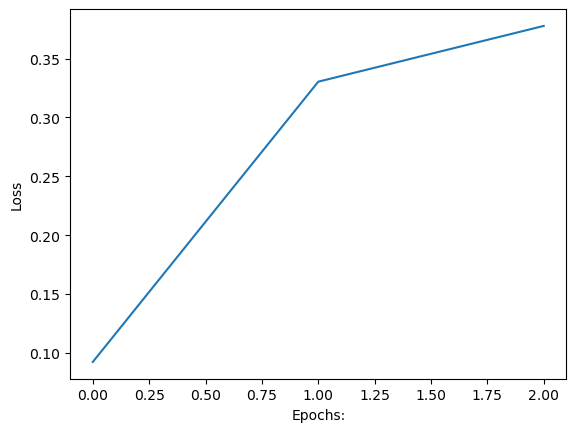

In [19]:
#plot loss
plt1.plot(loss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt1.show()

In [20]:
print(w1, "/n", w2)

[[-2.46450467e+00 -9.13083900e-01  1.93089801e+00 -6.97752879e-01
   8.44981276e-01]
 [-4.98082914e-01 -3.35100724e-01 -8.69312017e-02  2.14064828e-01
  -3.40864102e-01]
 [ 2.30340814e+00  1.78287929e+00 -1.36707950e+00 -1.07645485e+00
  -2.89325442e-01]
 [-7.57683815e-01 -7.93227979e-01  8.15430719e-04 -2.47945543e-01
  -7.98451644e-01]
 [ 2.03507502e+00  1.53555392e+00  6.53670368e-01  5.78852464e-01
   8.36324779e-02]
 [-9.49796799e-01 -3.48930015e-01 -1.10360770e+00 -9.90208923e-01
   1.59674996e+00]
 [-1.03574958e+00  3.27739885e+00 -5.55874219e-01 -4.94140771e-01
  -2.04521905e+00]
 [ 3.64956351e-01  1.67676528e+00  5.45012858e-01  2.39194526e-01
   4.98371481e-01]
 [-7.59004785e-02  1.61481485e+00 -1.56526761e+00  2.81042327e-01
   7.24066142e-01]
 [-4.13887670e-01 -6.78801484e-01  1.06696468e+00  1.89188982e+00
   6.25039011e-01]
 [ 4.63542407e-01  5.43642330e-01  2.98971244e-01  8.53226809e-01
   7.22524987e-01]
 [ 8.97750267e-01 -3.50804987e-03 -5.22504980e-01 -1.71017507e-01

Image is of letter C


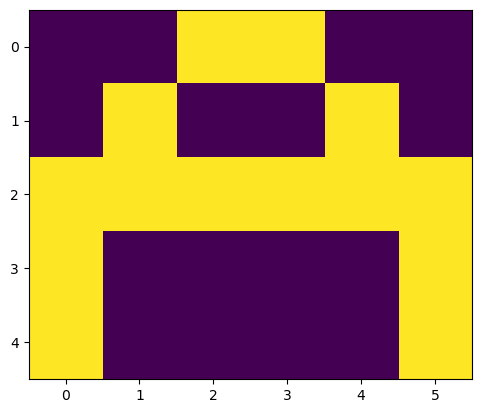

In [21]:
predict(x[0], w1, w2)

Image is of letter C


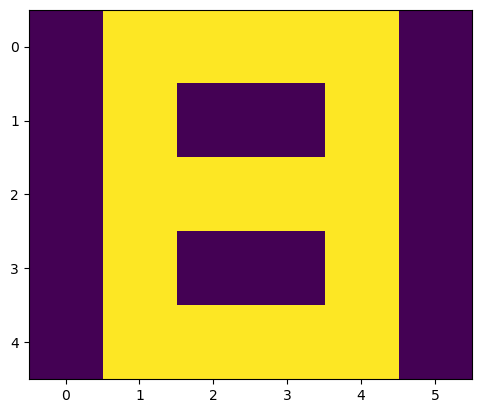

In [22]:
predict(x[1],w1,w2)

Image is of letter C


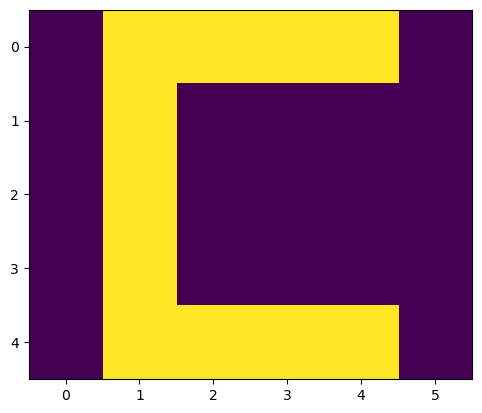

In [23]:
predict(x[2], w1, w2)